# No-change scenario - benchmark comparison

Notebook containing the analysis and predictions achieved with the benchmark method which assumes that no morphological change occurs ('no-change scenario').

In [1]:
# move to root directory

%cd ..
%cd .. 

c:\Users\Magherin\OneDrive - Stichting Deltares\Desktop\jamuna_morpho\benchmarks
c:\Users\Magherin\OneDrive - Stichting Deltares\Desktop\jamuna_morpho


In [2]:
# reload modules to avoid restarting the notebook every time these are updated

%load_ext autoreload
%autoreload 2

In [3]:
# import modules 

import torch

from model.train_eval import * 
from preprocessing.dataset_generation import create_full_dataset
from postprocessing.save_results import *
from postprocessing.plot_results import *
from benchmarks.no_change.nochange import *

# Enable interactive widgets in Jupyter Notebook
%matplotlib inline
%matplotlib widget

In [4]:
# set the device where operations are performed
# if only one GPU is present you might need to remove the index "0" 
# torch.device('cuda:0') --> torch.device('cuda') / torch.cuda.get_device_name(0) --> torch.cuda.get_device_name() 

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print("CUDA Device Count: ", torch.cuda.device_count())
    print("CUDA Device Name: ", torch.cuda.get_device_name(0))
else:
    device = 'cpu'
    
print(f'Using device: {device}')

Using device: cpu


Directories of original and preprocessed images. 

In [5]:
# set common keys required for functions

train = 'training'
val = 'validation'
test = 'testing'

In [6]:
# load all datasets

# by default March images are used - if another month is used change the number (available months: 1-4)
dataset_path = r'data\satellite\dataset_month3' 

dtype=torch.float32

val_set = create_full_dataset(val, dir_folders=dataset_path, device=device, dtype=dtype)
test_set = create_full_dataset(test, dir_folders=dataset_path, device=device, dtype=dtype)

In [7]:
loss_f = 'BCE'

In [8]:
# validation dataset 
val_loss, val_accuracy, val_precision, val_recall, val_f1_score, val_csi_score = validation_nochange(val_set, device=device, loss_f=loss_f)

print(f'Average metrics for validation dataset using "no-change" scenario:\n\n\
{loss_f} loss:          {val_loss:.3e}\n\
Accuracy:          {val_accuracy:.3f}\n\
Precision:         {val_precision:.3f}\n\
Recall:            {val_recall:.3f}\n\
F1 score:          {val_f1_score:.3f}\n\
CSI score:         {val_csi_score:.3f}')

Average metrics for validation dataset using "no-change" scenario:

BCE loss:          8.458e+00
Accuracy:          0.915
Precision:         0.609
Recall:            0.611
F1 score:          0.610
CSI score:         0.438


In [9]:
# testing dataset

test_loss, test_accuracy, test_precision, test_recall, test_f1_score, test_csi_score = validation_nochange(test_set, device=device, loss_f=loss_f)

print(f'Average metrics for test dataset using model with best validation recall:\n\n\
{loss_f} loss:          {test_loss:.3e}\n\
Accuracy:          {test_accuracy:.3f}\n\
Precision:         {test_precision:.3f}\n\
Recall:            {test_recall:.3f}\n\
F1 score:          {test_f1_score:.3f}\n\
CSI score:         {test_csi_score:.3f}')

Average metrics for test dataset using model with best validation recall:

BCE loss:          7.775e+00
Accuracy:          0.922
Precision:         0.660
Recall:            0.662
F1 score:          0.661
CSI score:         0.494


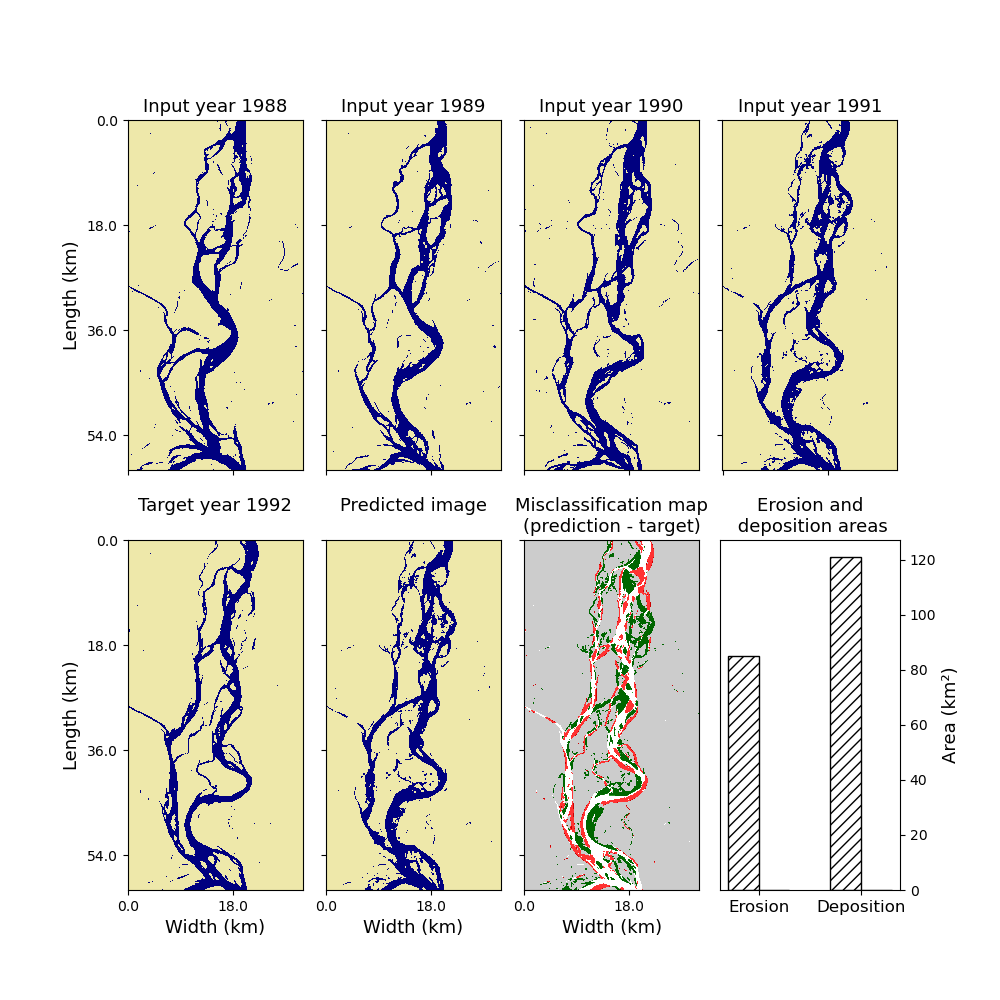

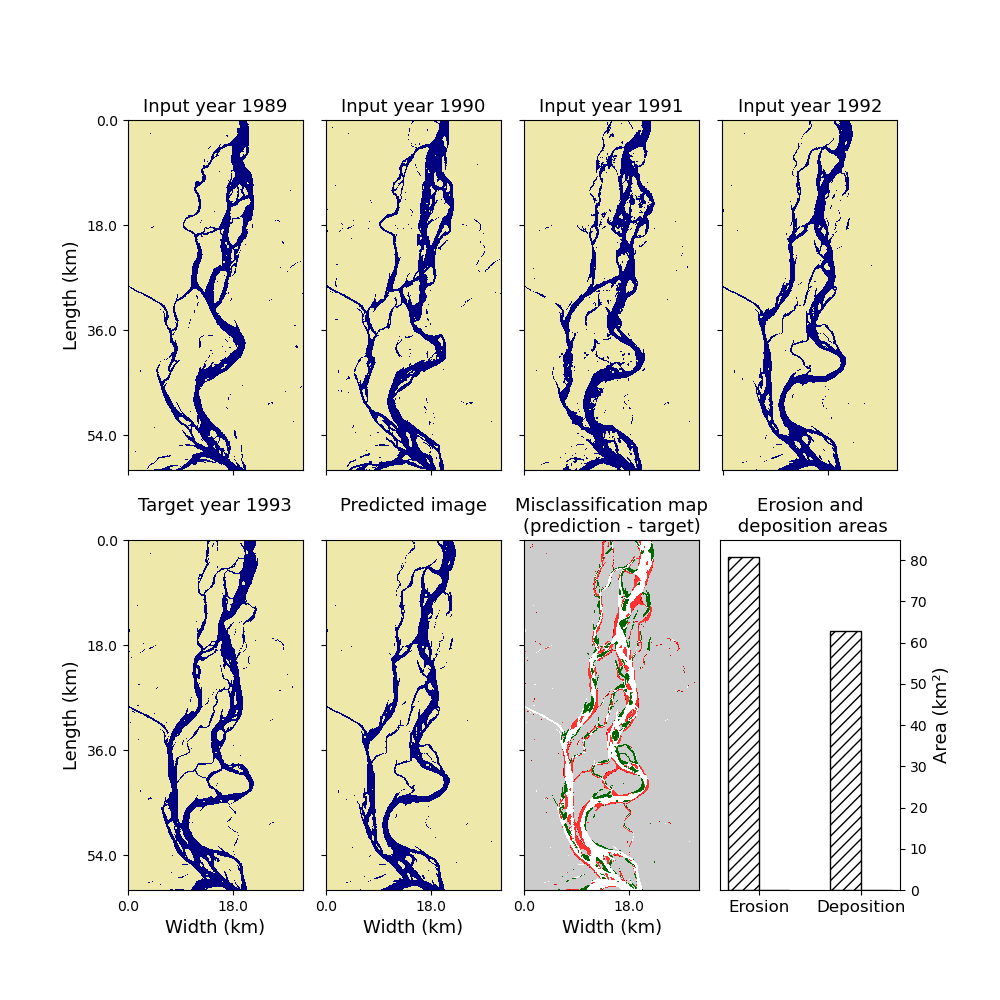

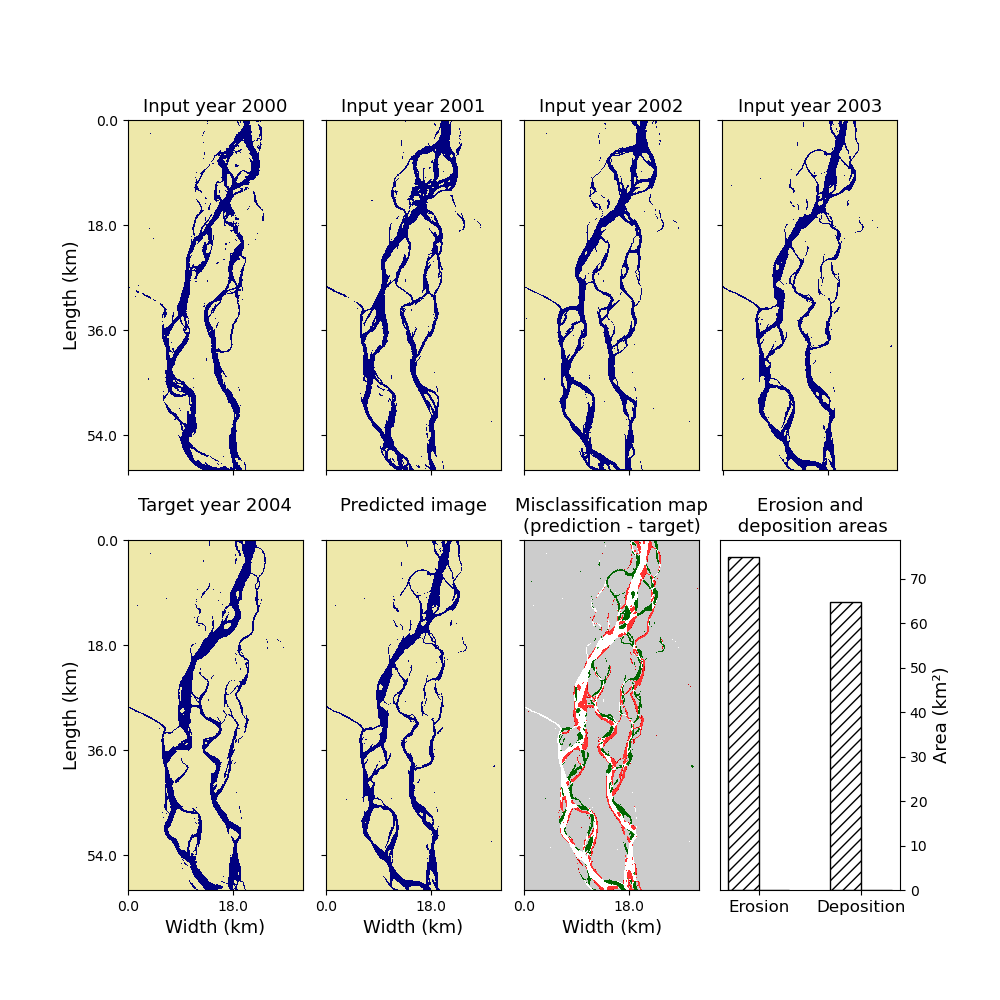

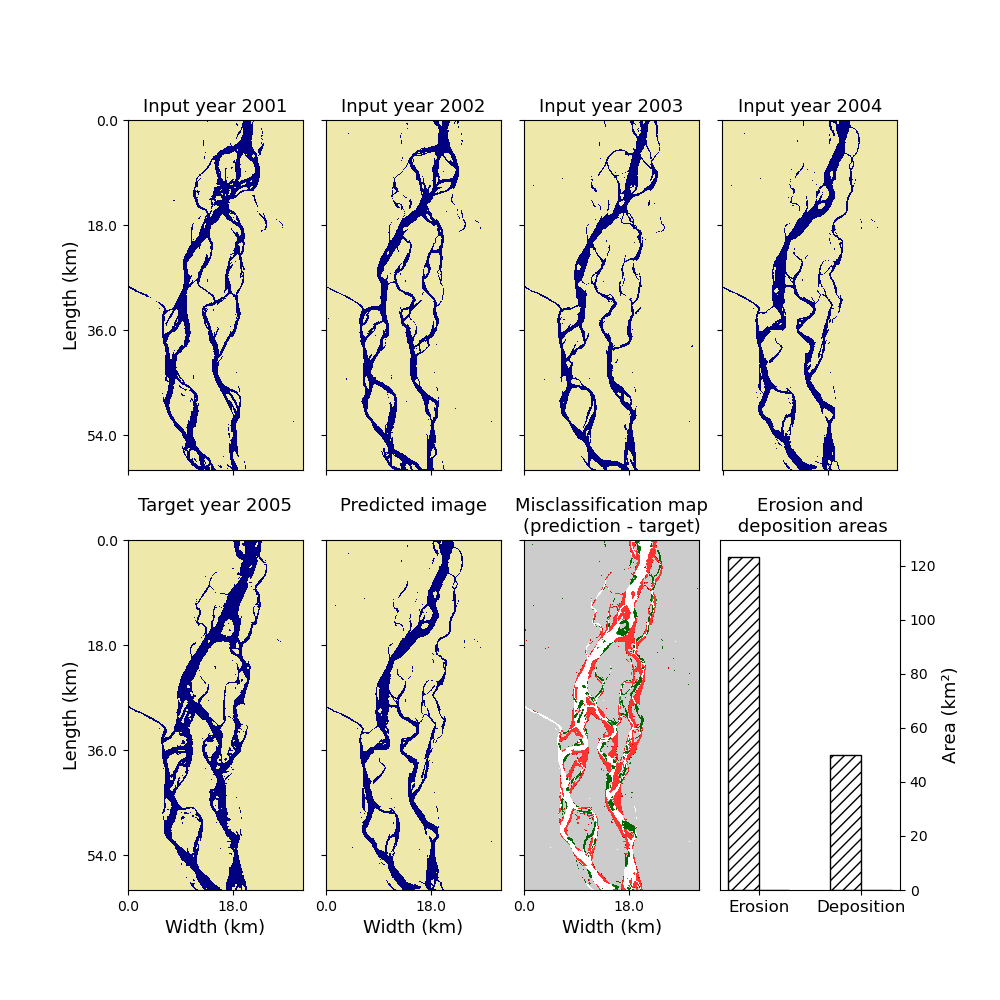

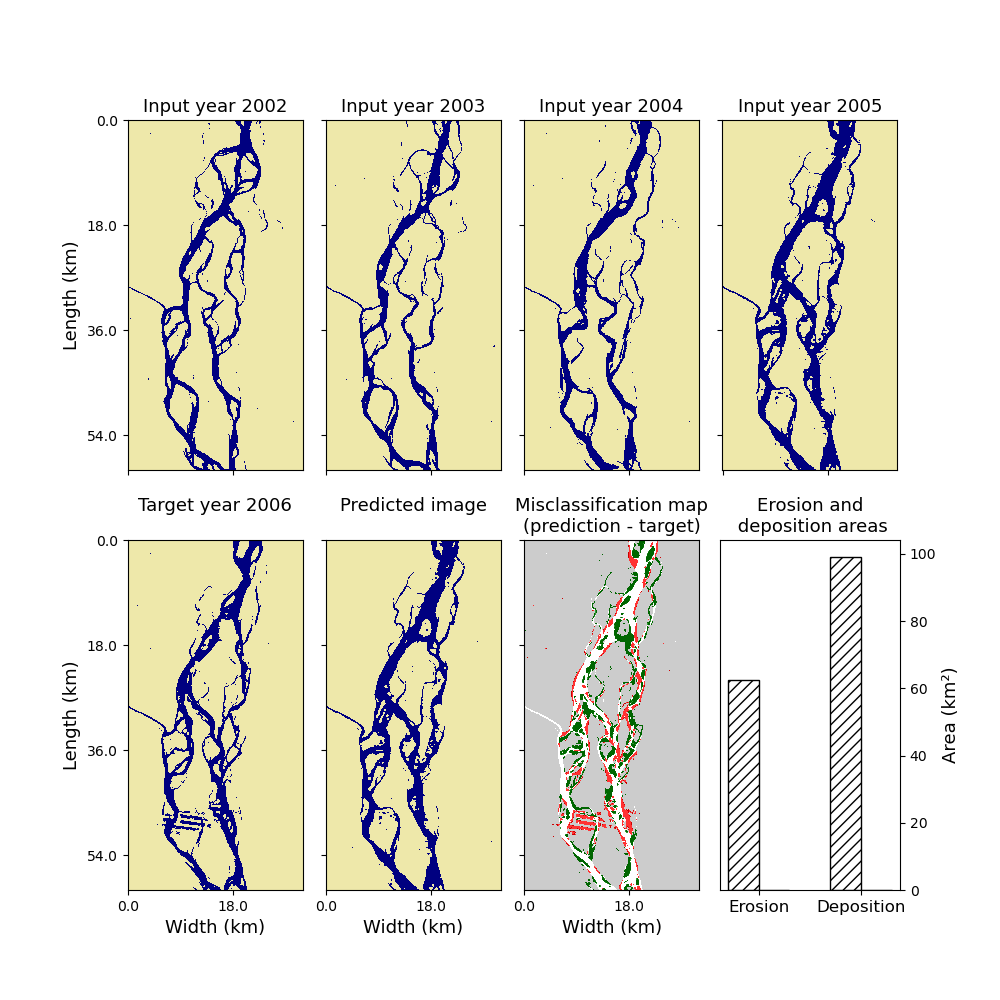

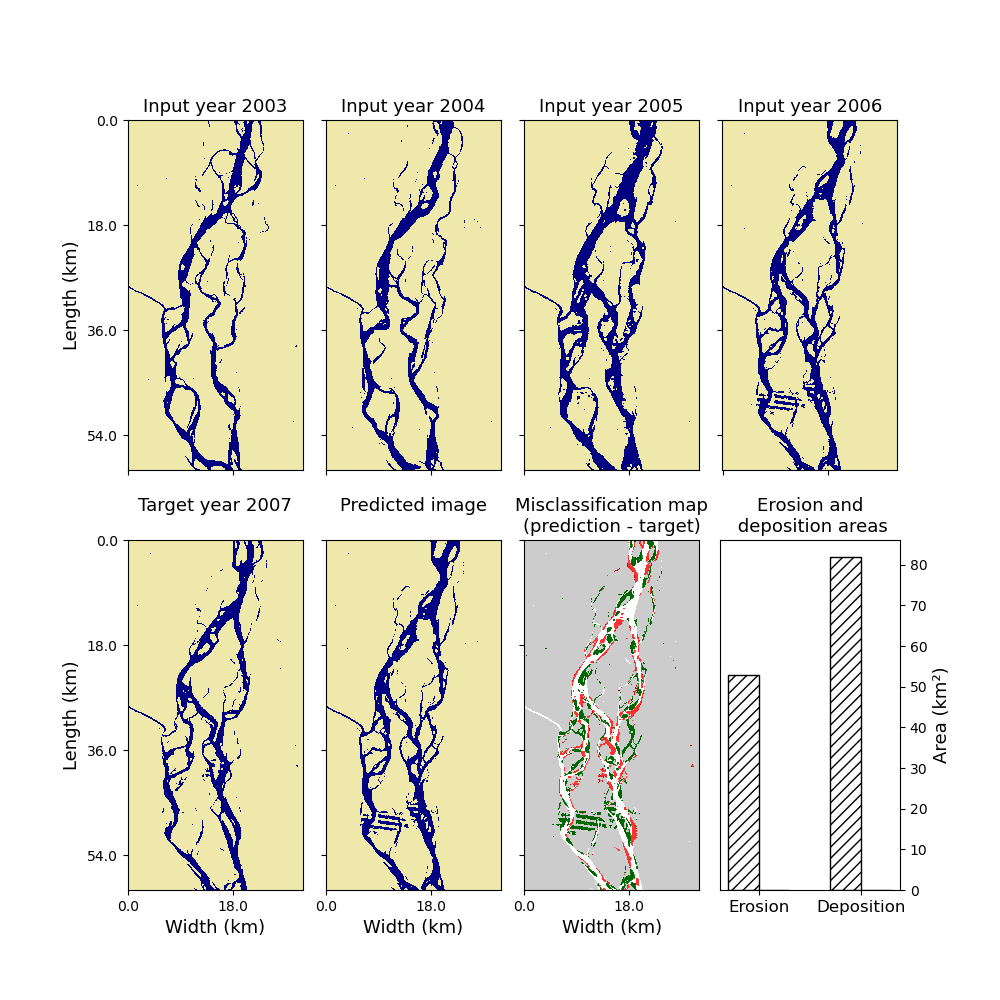

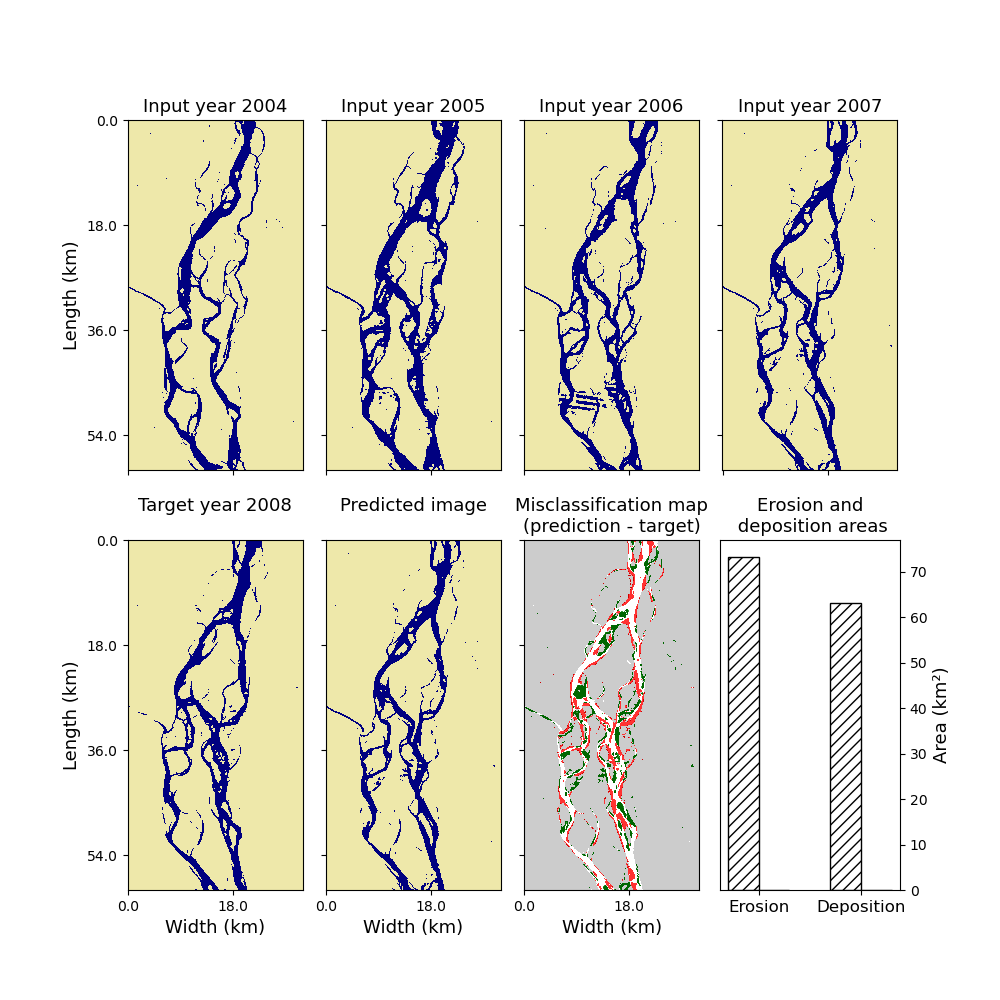

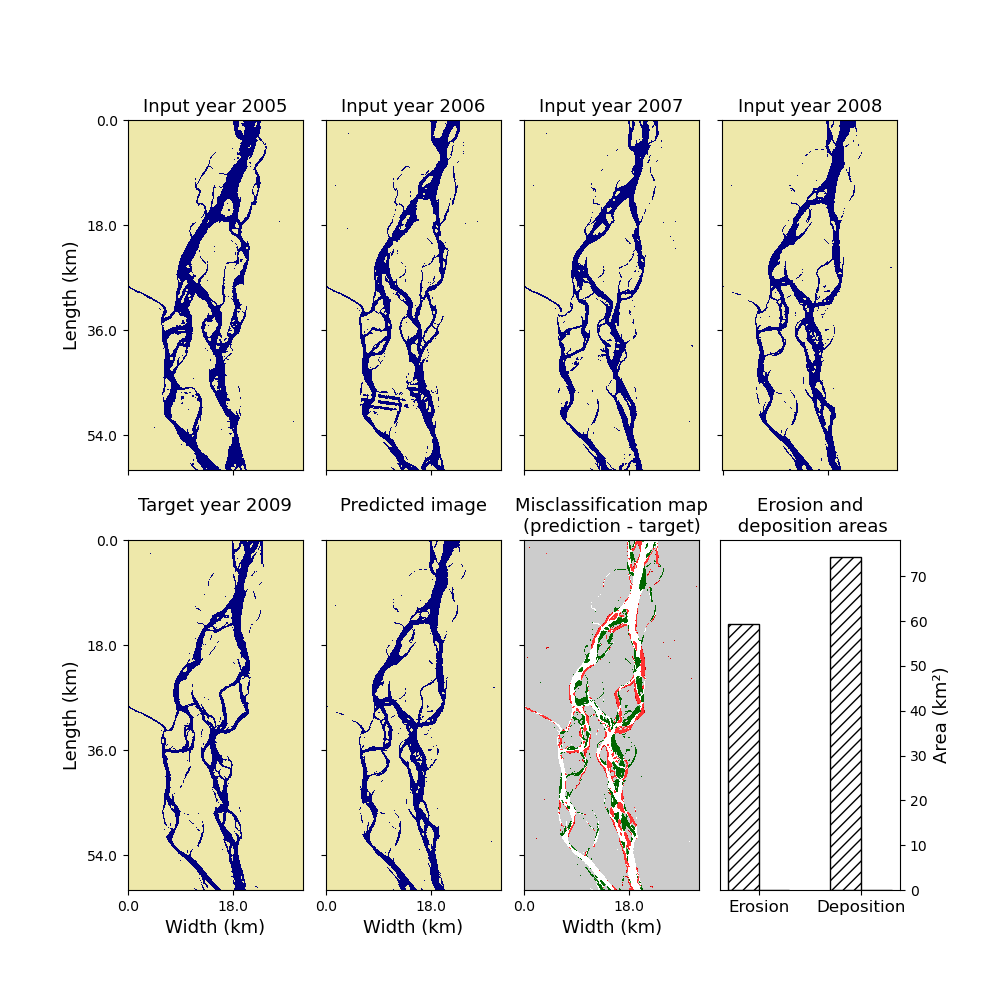

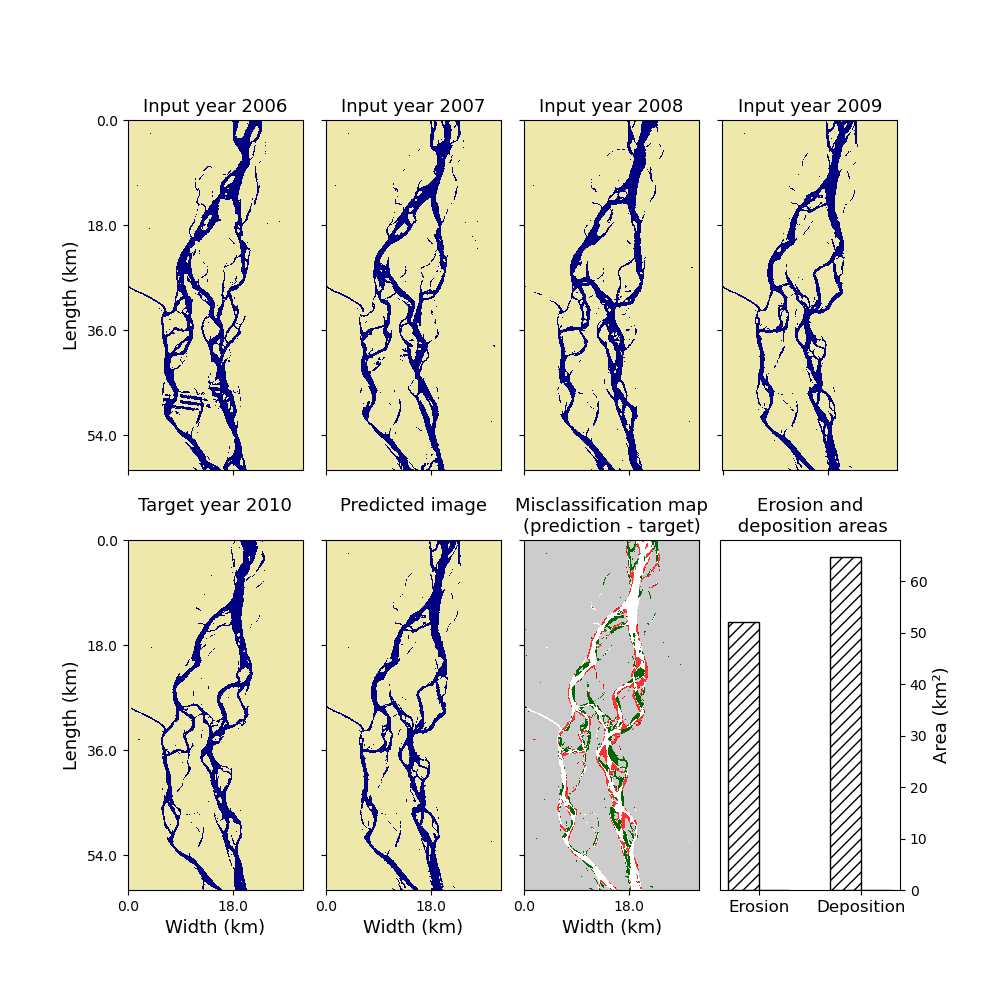

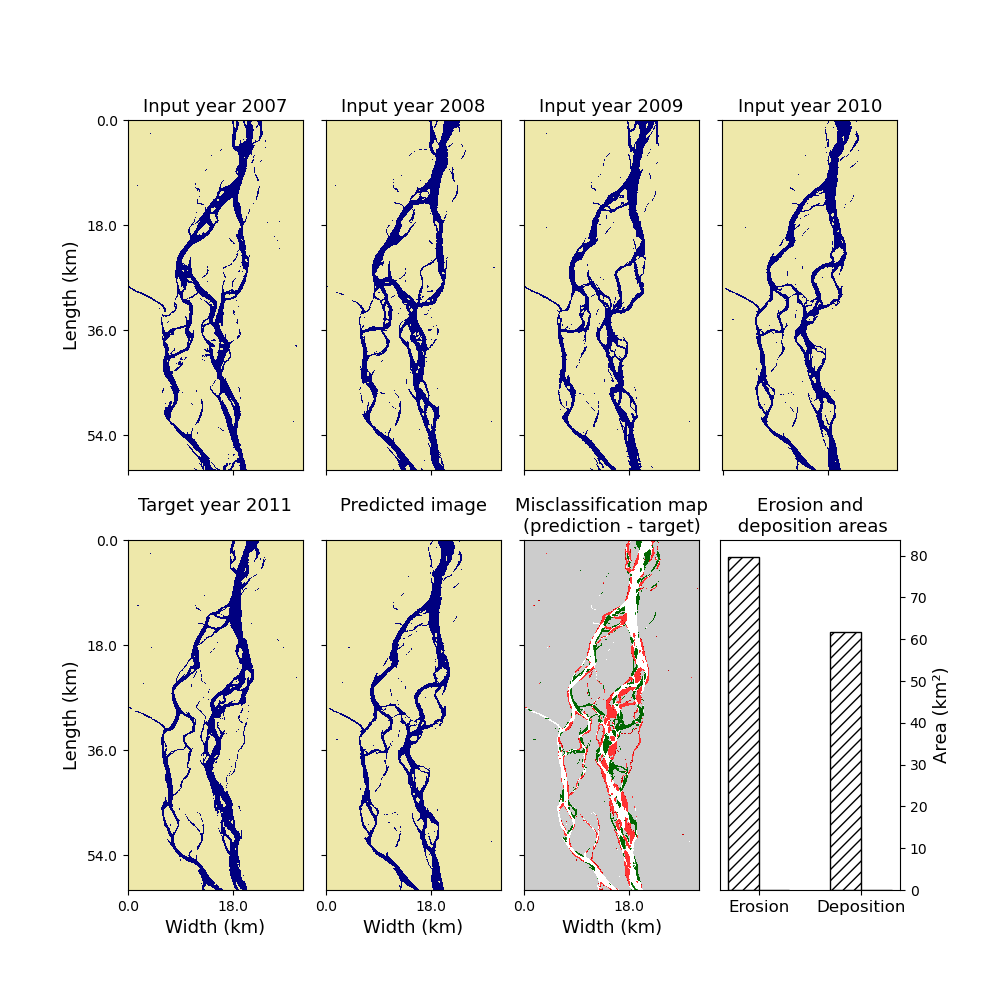

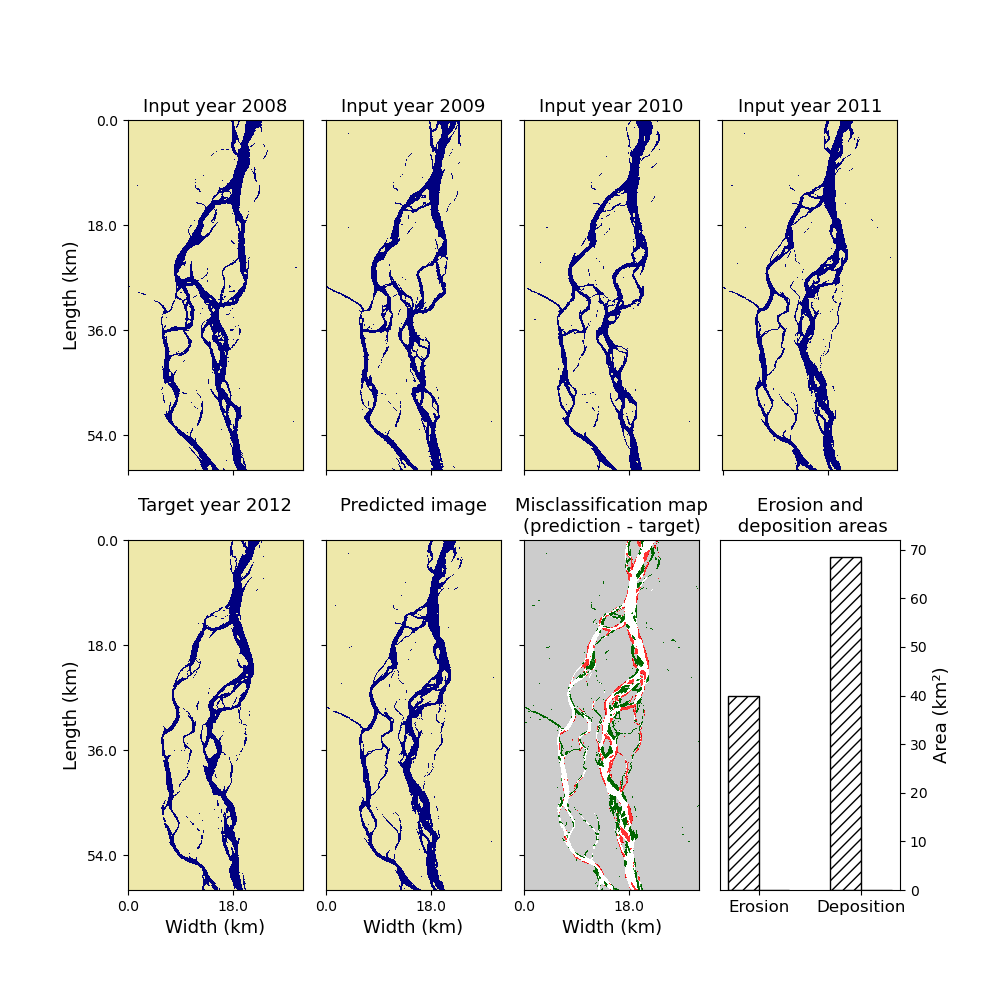

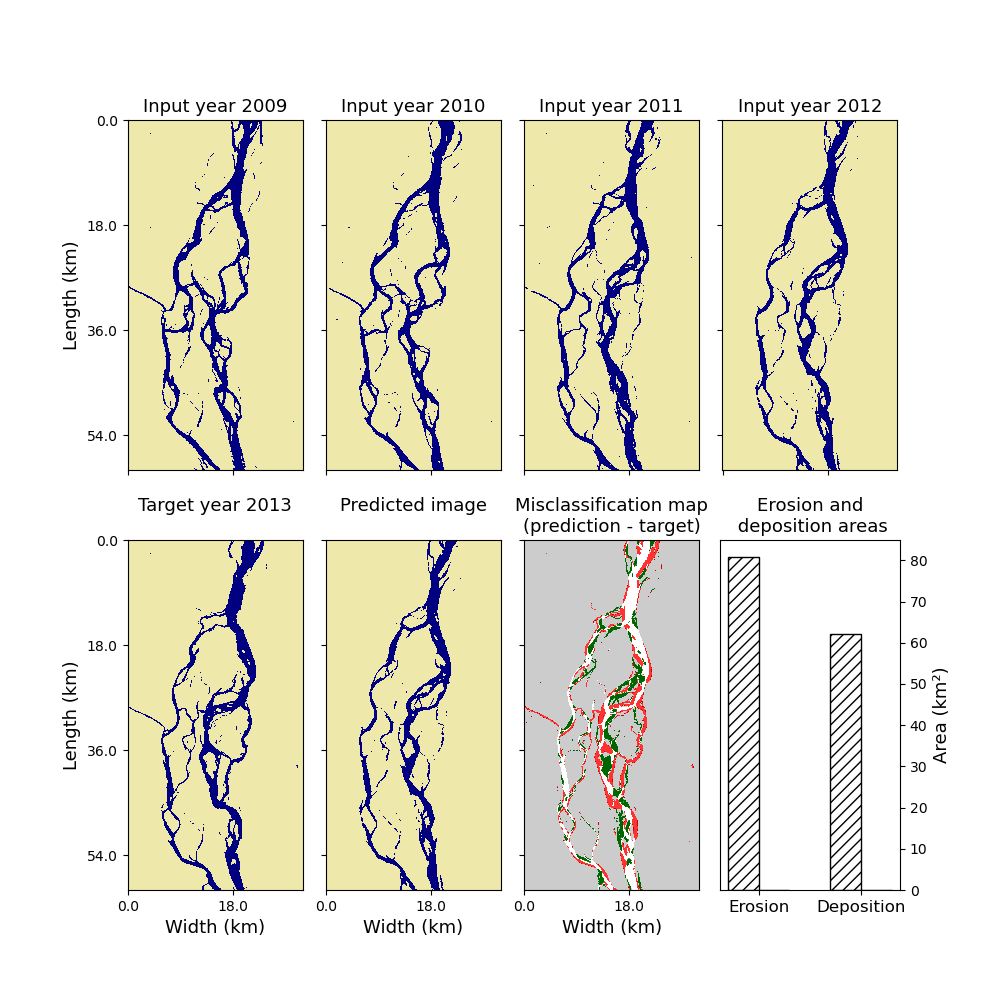

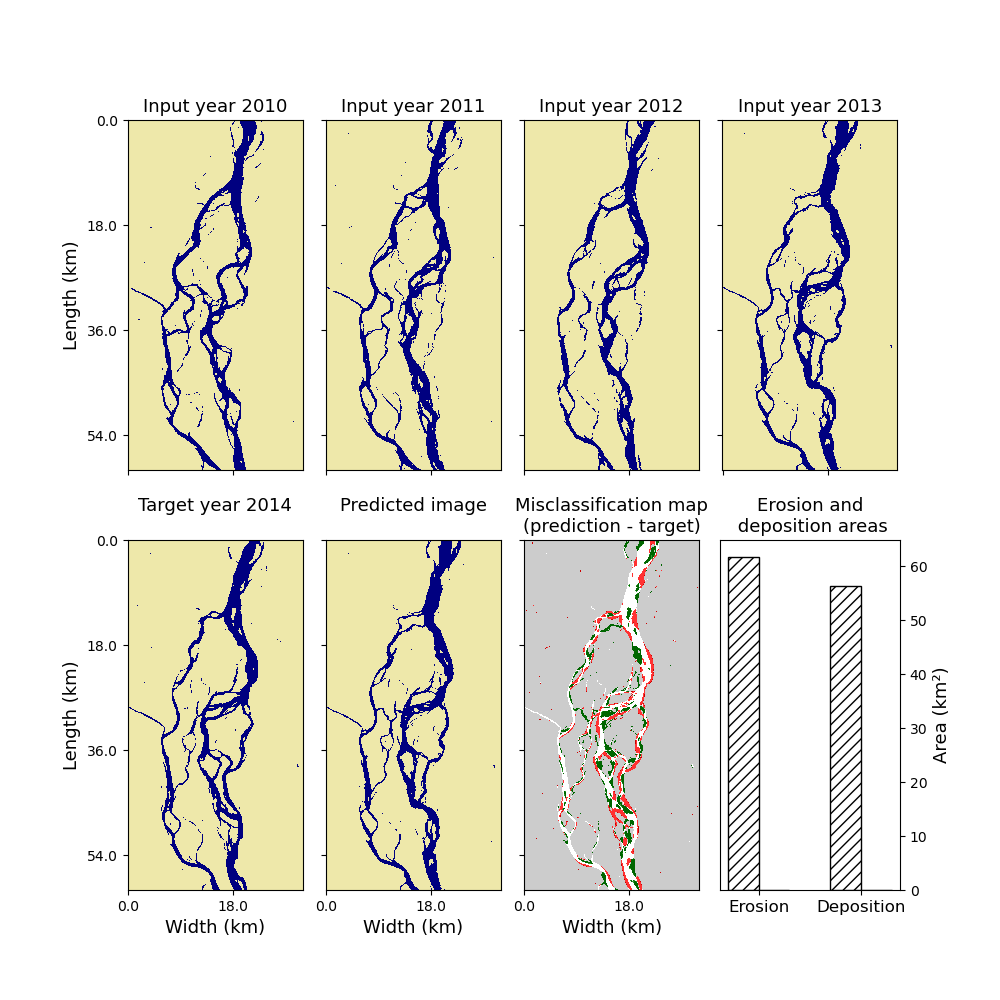

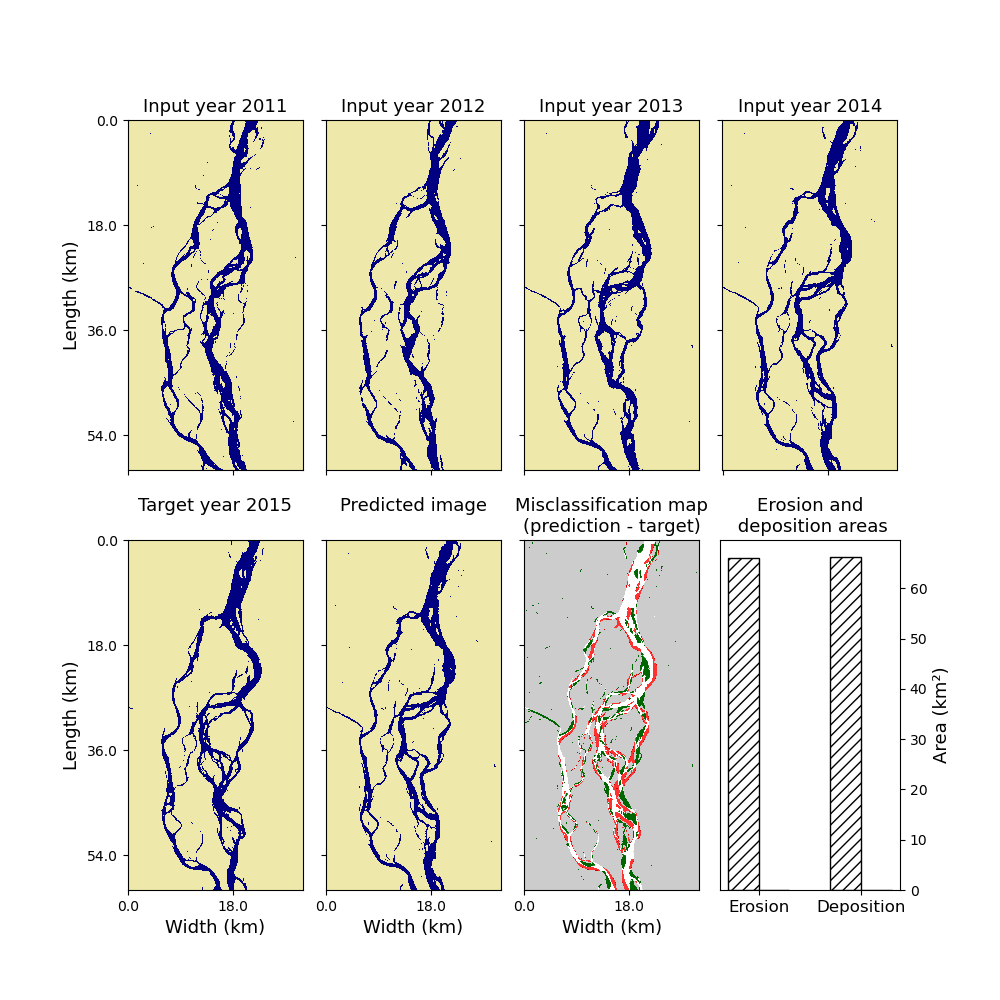

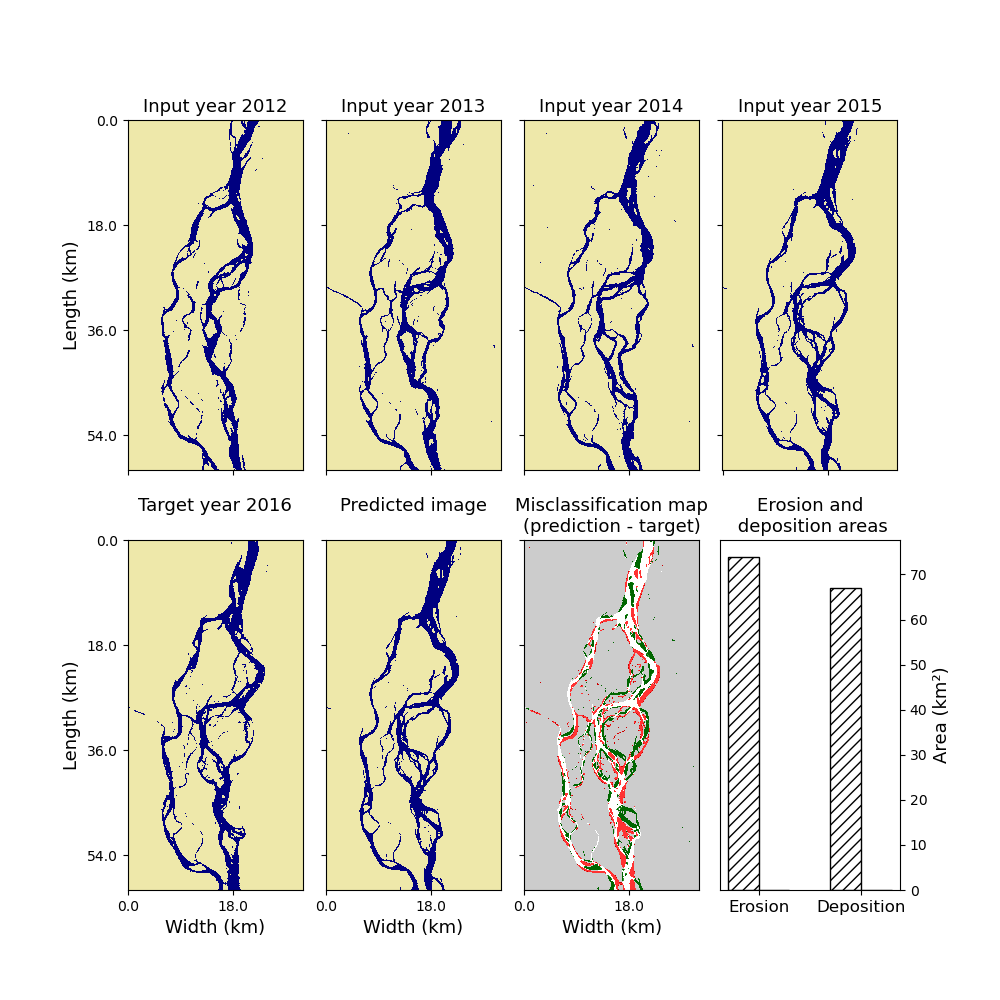

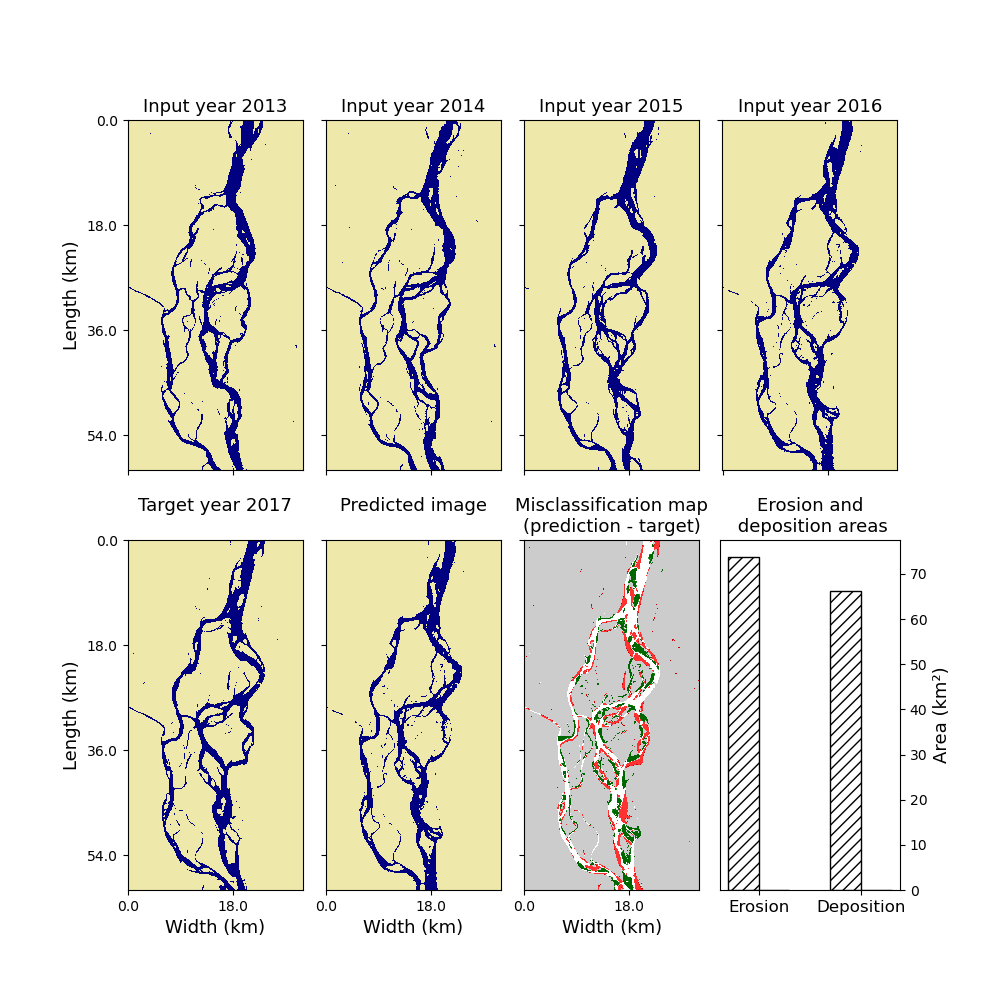

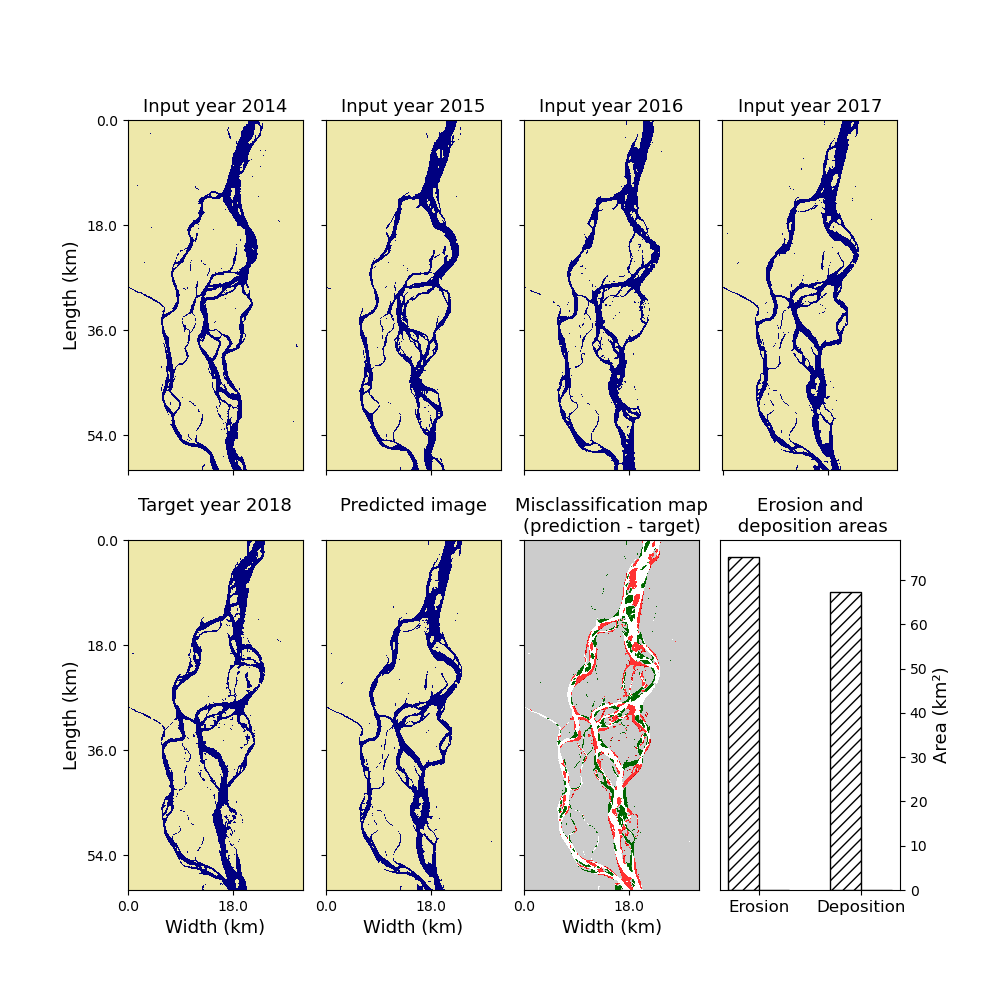

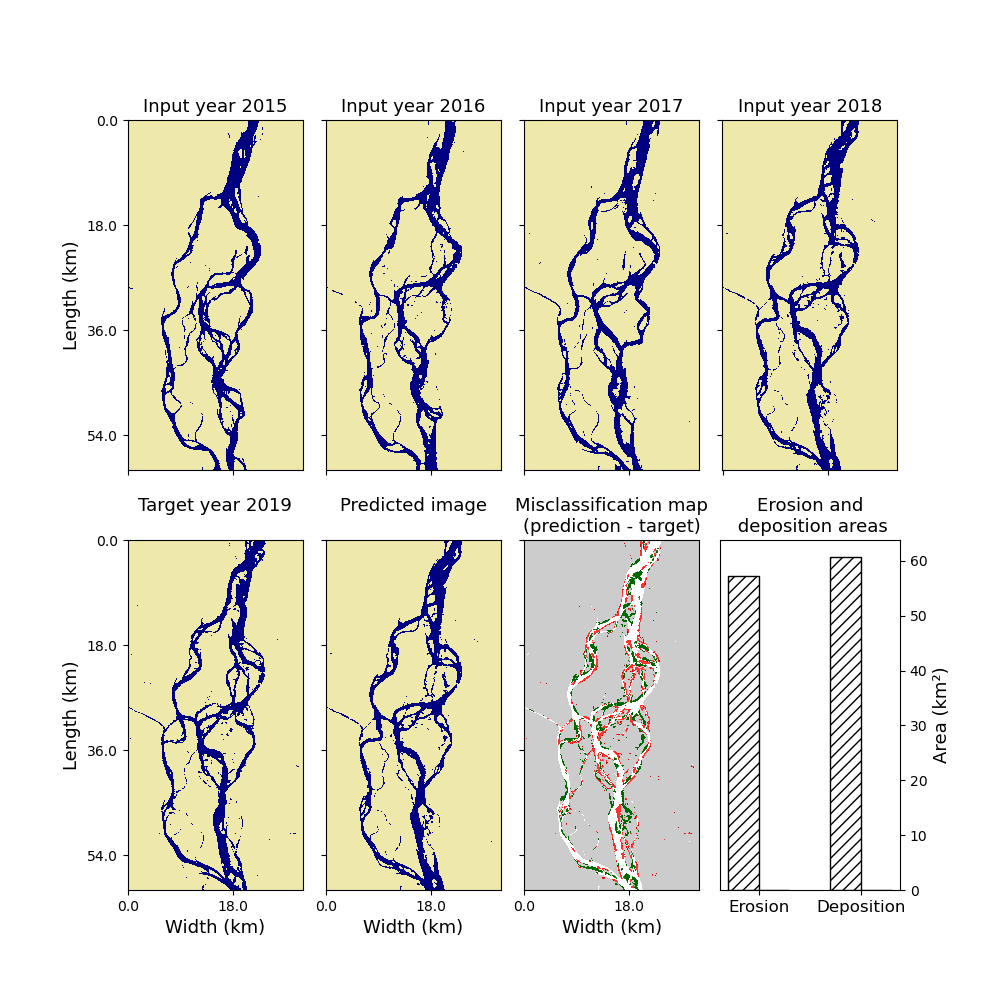

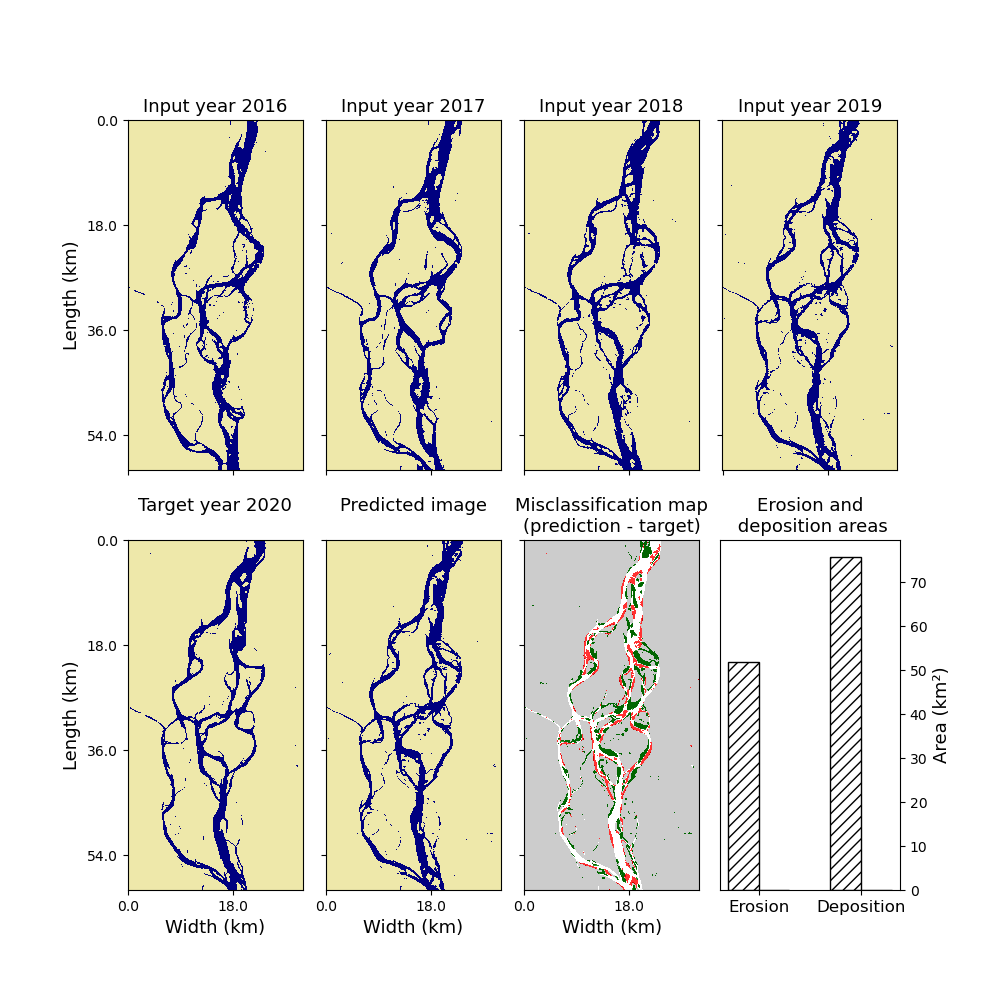

In [17]:
for i in range(len(test_set)):
    show_evolution_nochange(i, test_set, device=device, save_img=True)